In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42 #allows text in saved .pdf files to be edited in illustrator

Populating the interactive namespace from numpy and matplotlib


In [2]:
import group_data as gd

In [3]:
fly = gd.GMR22H05_pr_swarm.flies[0]

In [4]:
def parse_GMR_genotype(genotype):
    """get the GMR and UAS keys in a given genotype"""
    print genotype
    gcamp_idx =  genotype.find('GCaMP6f')
    GFP_idx = genotype.find('GFP')
    gmr_idx = genotype.find('GMR')
    gmr_str = genotype[gmr_idx+3:gmr_idx+8]
    if gcamp_idx > 0:
        return {'uas':'GCaMP6f','gal4':gmr_str}
    elif GFP_idx > 0:
        return {'uas':'eGFP','gal4':gmr_str}
    
def get_line_database(line_name):
    #print line_name
    import cPickle
    f = open('../mn_expression_matrix_plot/line_database.cpkl','rb')
    line_database = cPickle.load(f)
    f.close()
    return line_database

def get_muscle_list(line_name):
    line_database = get_line_database(line_name)
    muscle_names = list()
    for key in line_database[line_name].keys():
        if line_database[line_name][key] > 0:
            muscle_names.append(key)
    muscle_names = sorted(muscle_names)
    #muscle_names = sorted(get_muscle_list(line_name))
    return muscle_names

+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+


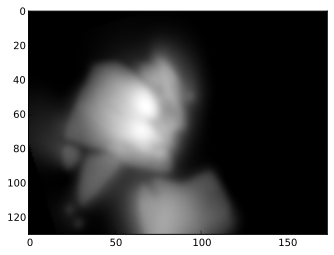

In [20]:
import muscle_model as mm
import numpy as np
import h5py
import cv2
model_type = 'volumetric'
#model_type = 'masks'
#load the reference frame of the cofocal data and that of the imaged fly
confocal_model = mm.GeometricModel(filepath = gd.muscle_anatomy_dir + 'confocal_outline_model.cpkl')
confocal_view = mm.ModelViewMPL(confocal_model)
pkname = fly.fly_path + '/basis_fits.cpkl'
fly_frame = mm.Frame();fly_frame.load(pkname)
#get the transformation matrix A and compose with a scaling using a scaling of s
#to construct a transformation for homogenious vectors
s = 1 #scale
A = fly_frame.get_transform(confocal_model.frame)
Ap = np.dot([[s,0.0,0],[0,s,0],[0,0,1]],A)
#pars the GMR genotype to get the line name
line_name = parse_GMR_genotype(fly.get_genotype())['gal4']
#get the list of muscles for a given line
muscles = get_muscle_list(line_name)
muscles = [m for m in muscles if not('DVM' in m) and not('DLM' in m) and not('ps' in m)]
#get a reference to the image data
fly_record = h5py.File(fly.fly_path + 'fly_record.hdf5','r')
exp_record = fly_record['experiments'].values()[0]
imgs = exp_record['tiff_data']['images']
#the output shape of the warped model
output_shape = shape(imgs[0])
if model_type == 'masks':
    #get the mask of all the muscles for fit
    masks = confocal_model.get_masks(fly_frame,np.shape(imgs[0]))
    #create the model using only the muscles that express in a given line
    model = np.vstack([masks[mask_key].T.ravel().astype(float) for mask_key in muscles])
    #construct a mask do reduce the projection to just the data within the model
    fit_pix_mask = np.sum(model,axis=0) > 0
if model_type == 'volumetric':
    model_data = h5py.File(gd.muscle_anatomy_dir + 'flatened_model.hdf5','r')
    model = vstack([cv2.warpAffine(np.array(model_data[muscle]), \
                                   Ap[:-1,:],output_shape).T.ravel() \
                    for muscle in muscles])
plb.imshow(np.sum(model,axis = 0).reshape(np.shape(imgs[0])),cmap = plb.cm.gray)

#add a background term
####model = np.vstack([model,np.ones_like(masks[mask_key].ravel())])
#plb.imshow(np.sum(model,axis = 0).reshape(np.shape(imgs[0])),cmap = plb.cm.gray)
##subtract baseline epoch from each image
#f = open(fly_path + 'epoch_data.cpkl')
#import cPickle
#baseline_range = cPickle.load(f)['baseline_F']
#f.close()
#baseln = np.mean(imgs[baseline_range],axis = 0)

In [6]:
model_data = h5py.File(gd.muscle_anatomy_dir + 'flatened_model.hdf5','r')

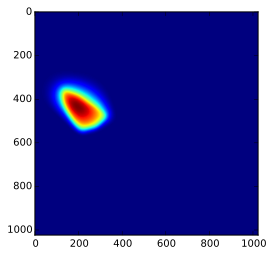

In [7]:
imshow(np.array(model_data['b1']))

In [25]:
muscles = get_muscle_list(line_name)
muscles = [m for m in muscles if not('DVM' in m) and not('DLM' in m) and not('ps' in m)]

In [22]:
confocal_model = mm.GeometricModel(filepath = gd.muscle_anatomy_dir + 'confocal_outline_model.cpkl')
confocal_view = mm.ModelViewMPL(confocal_model)
fly_frame = mm.Frame();fly_frame.load(pkname)    
A = fly_frame.get_transform(confocal_model.frame)
Ap = np.dot([[s,0.0,0],[0,s,0],[0,0,1]],A)

In [147]:
output_shape = shape(imgs[0])
model = vstack([cv2.warpAffine(np.array(model_data[muscle]),Ap[:-1,:],output_shape).ravel() for muscle in muscles])

In [21]:
shape(model)

(17, 22620)

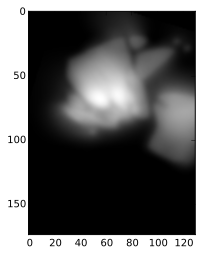

In [17]:
plb.imshow(np.sum(model,axis = 0).reshape(np.shape(imgs[0])[::-1]),cmap = plb.cm.gray)

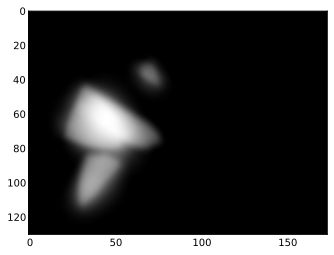

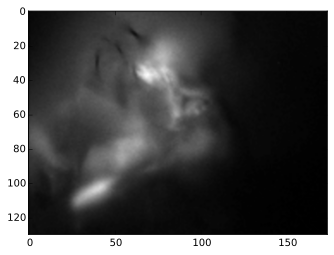

In [136]:
imshow(imgs[1000],cmap = cm.gray)

(array([  2.20000000e+04,   6.50000000e+01,   4.50000000e+01,
          3.00000000e+01,   3.30000000e+01,   1.90000000e+01,
          2.50000000e+01,   1.10000000e+01,   1.60000000e+01,
          2.30000000e+01,   9.00000000e+00,   1.20000000e+01,
          9.00000000e+00,   1.40000000e+01,   1.40000000e+01,
          9.00000000e+00,   6.00000000e+00,   1.10000000e+01,
          8.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          1.30000000e+01,   6.00000000e+00,   9.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   7.00000000e+00,
          4.00000000e+00,   7.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   7.00000000e+00,
          2.00000000e+00,   8.00000000e+00,   6.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
        

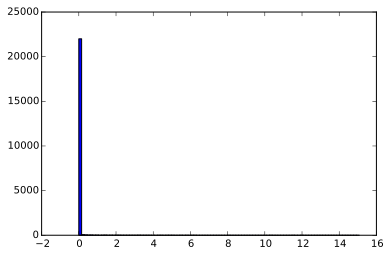

In [140]:
hist(iii3_.ravel(),bins = 100)